In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance_claims.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.drop(['_c39'],axis=1,inplace=True)

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
df.drop(['policy_number','incident_location','policy_bind_date'],axis=1,inplace=True)

In [8]:
obj=df.select_dtypes(include=['O'])

In [9]:
obj.nunique()

policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_date              60
incident_type               4
collision_type              4
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             3
police_report_available     3
auto_make                  14
auto_model                 39
fraud_reported              2
dtype: int64

In [10]:
df.drop(['incident_date','auto_model','auto_make','insured_occupation','insured_hobbies'],axis=1,inplace=True)

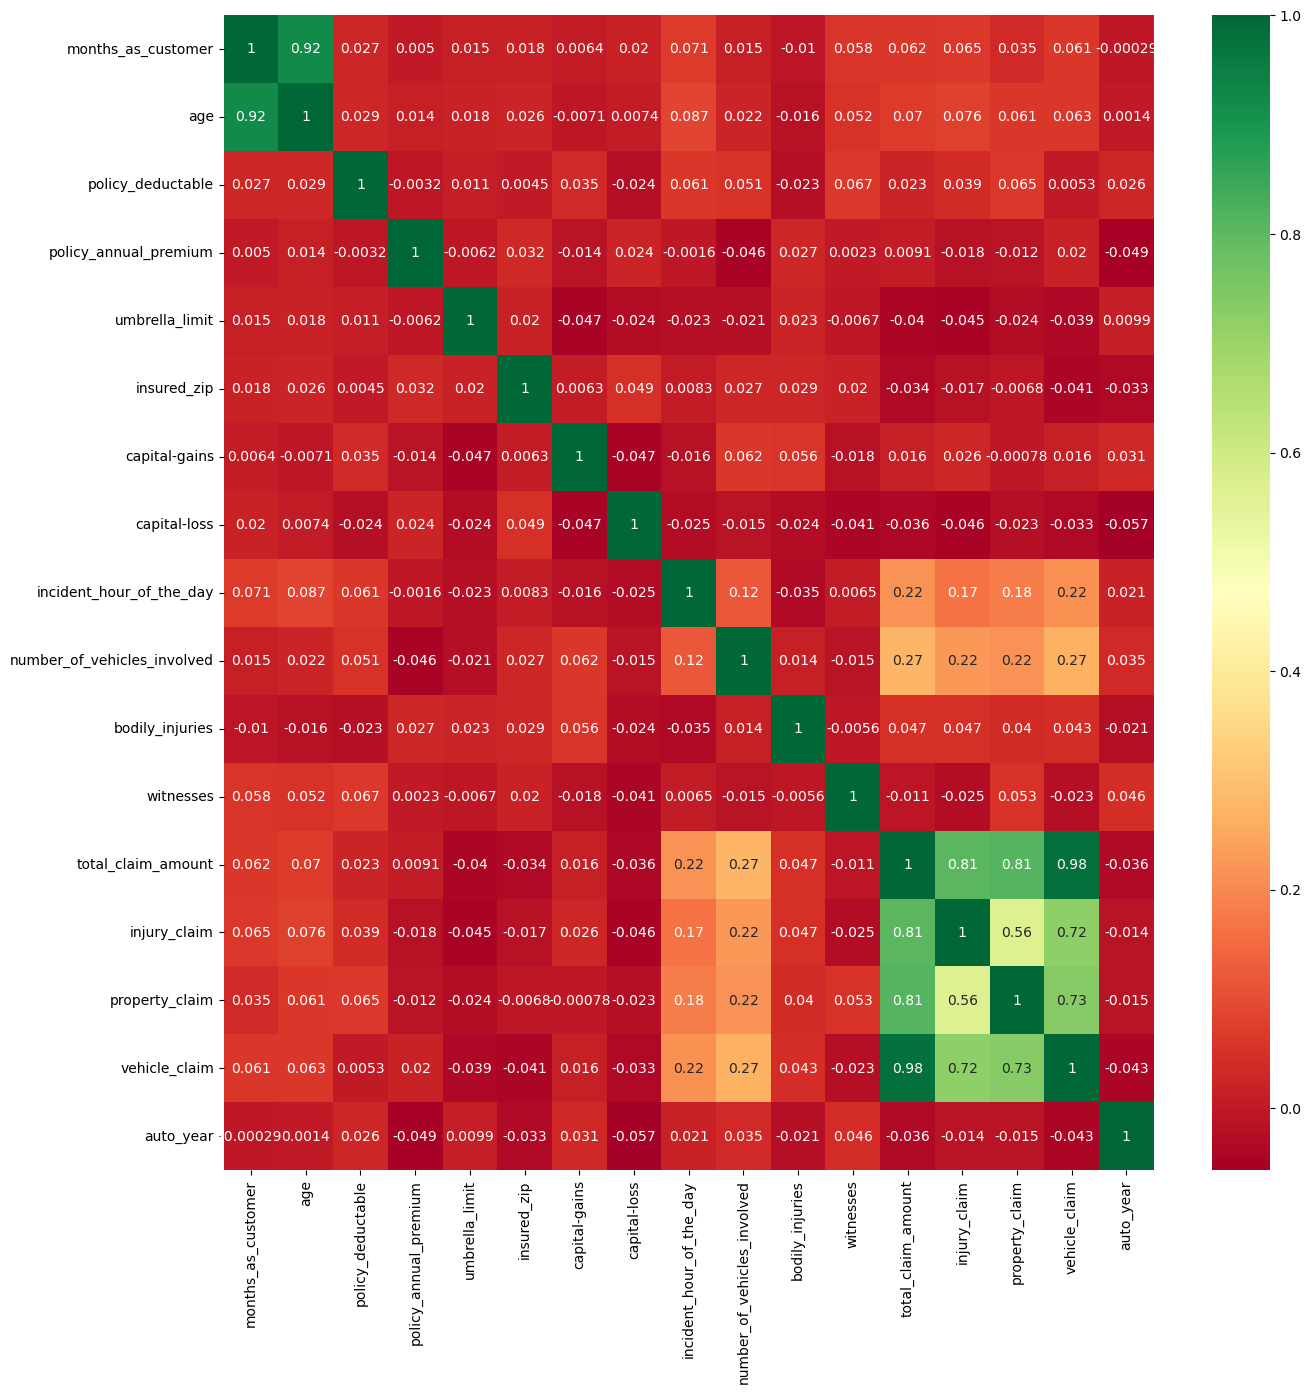

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


plt.show()

In [12]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [13]:
df['police_report_available'].mode()[0]

'?'

In [14]:
df.drop(['police_report_available','umbrella_limit','capital-loss',],axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
obj.nunique()

policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_date              60
incident_type               4
collision_type              4
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             3
police_report_available     3
auto_make                  14
auto_model                 39
fraud_reported              2
dtype: int64

In [17]:
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or more unique categories
        if len(list(df[col].unique()))>=2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1

In [18]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,466132,1,4,0,...,1,2,1,2,71610,6510,13020,52080,2004,1
1,228,42,1,1,2000,1197.22,468176,1,4,2,...,1,0,0,0,5070,780,780,3510,2007,1
2,134,29,2,0,2000,1413.14,430632,0,6,3,...,3,1,2,3,34650,7700,3850,23100,2007,0
3,256,41,0,1,2000,1415.74,608117,0,6,4,...,1,0,1,2,63400,6340,6340,50720,2014,1
4,228,44,0,2,1000,1583.91,610706,1,0,4,...,1,1,0,1,6500,1300,650,4550,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,431289,0,5,4,...,1,2,0,1,87200,17440,8720,61040,2006,0
996,285,41,0,0,1000,1436.79,608177,0,6,5,...,1,2,2,3,108480,18080,18080,72320,2015,0
997,130,34,2,1,500,1383.49,442797,0,5,2,...,3,0,2,3,67500,7500,7500,52500,1996,0
998,458,62,0,2,2000,1356.92,441714,1,0,5,...,1,0,0,1,46980,5220,5220,36540,1998,0


In [19]:
for i in df.columns[0:]:
    df[i]=(df[i] - df[i].min()) /(df[i].max()-df[i].min())


In [20]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,0.684760,0.644444,1.0,0.5,0.333333,0.603112,0.188769,1.0,0.666667,0.0,...,0.000000,1.0,0.5,0.666667,0.622801,0.303497,0.550063,0.654296,0.45,1.0
1,0.475992,0.511111,0.5,0.5,1.000000,0.473214,0.199478,1.0,0.666667,0.4,...,0.000000,0.0,0.0,0.000000,0.043285,0.036364,0.032953,0.043276,0.60,1.0
2,0.279749,0.222222,1.0,0.0,1.000000,0.606972,0.002766,0.0,1.000000,0.6,...,0.666667,0.5,1.0,1.000000,0.300906,0.358974,0.162653,0.289722,0.60,0.0
3,0.534447,0.488889,0.0,0.5,1.000000,0.608582,0.932699,0.0,1.000000,0.8,...,0.000000,0.0,0.5,0.666667,0.551298,0.295571,0.267850,0.637187,0.95,1.0
4,0.475992,0.555556,0.0,1.0,0.333333,0.712760,0.946264,1.0,0.000000,0.8,...,0.000000,0.5,0.0,0.333333,0.055739,0.060606,0.027461,0.056359,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,1.0,1.0,0.333333,0.543574,0.006209,0.0,0.833333,0.8,...,0.000000,1.0,0.0,0.333333,0.758579,0.813054,0.368399,0.767015,0.55,0.0
996,0.594990,0.488889,0.0,0.0,0.333333,0.621622,0.933013,0.0,1.000000,1.0,...,0.000000,1.0,1.0,1.000000,0.943912,0.842890,0.763836,0.908919,1.00,0.0
997,0.271399,0.333333,1.0,0.5,0.000000,0.588604,0.066505,0.0,0.833333,0.4,...,0.666667,0.0,1.0,1.000000,0.587006,0.349650,0.316857,0.659580,0.05,0.0
998,0.956159,0.955556,0.0,1.0,1.000000,0.572145,0.060831,1.0,0.000000,1.0,...,0.000000,0.0,0.0,0.333333,0.408291,0.243357,0.220532,0.458800,0.15,0.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
x= df.drop(['fraud_reported'],axis=1)
y= df['fraud_reported']

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [24]:
import tensorflow 
import keras
from keras.models import Sequential

In [25]:
from keras.layers import InputLayer, Dense
input_neurons = X_train.shape[1]

number_of_hidden_layers = 2
neuron_hidden_layer1_1 = 10
neuron_hidden_layer1_2 = 5

output_neurons = 1

In [26]:
input_neurons

27

In [27]:
model1= Sequential()
model1.add(InputLayer(input_shape=(input_neurons,)))

model1.add(Dense(units = neuron_hidden_layer1_1,activation='relu'))
model1.add(Dense(units = neuron_hidden_layer1_2,activation='relu'))

model1.add(Dense(units= output_neurons,activation='sigmoid'))

In [28]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                280       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 341 (1.33 KB)
Trainable params: 341 (1.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model1.compile(loss= 'binary_crossentropy',optimizer= 'Adam',metrics=['accuracy'])

In [30]:
Y_test= Y_test.astype('int32')

In [31]:
Y_train=Y_train.astype('int32')


In [32]:
model_history1=model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=45)

Epoch 1/45


25/25 [==============================] - 1s 15ms/step - loss: 0.7856 - accuracy: 0.3300 - val_loss: 0.7136 - val_accuracy: 0.5150
Epoch 2/45
25/25 [==============================] - 0s 5ms/step - loss: 0.7053 - accuracy: 0.5738 - val_loss: 0.6824 - val_accuracy: 0.6750
Epoch 3/45
25/25 [==============================] - 0s 5ms/step - loss: 0.6739 - accuracy: 0.6913 - val_loss: 0.6644 - val_accuracy: 0.7300
Epoch 4/45
25/25 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.7487 - val_loss: 0.6481 - val_accuracy: 0.7350
Epoch 5/45
25/25 [==============================] - 0s 5ms/step - loss: 0.6324 - accuracy: 0.7600 - val_loss: 0.6328 - val_accuracy: 0.7350
Epoch 6/45
25/25 [==============================] - 0s 5ms/step - loss: 0.6132 - accuracy: 0.7613 - val_loss: 0.6172 - val_accuracy: 0.7300
Epoch 7/45
25/25 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.7575 - val_loss: 0.5991 - val_accuracy: 0.7300
Epoch 8/45
25/25 

In [33]:
prediction1=(model1.predict(X_test) > 0.5 ).astype("int32")

7/7 [==============================] - 0s 2ms/step


In [34]:
accuracy_score(Y_test,prediction1)

0.77

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score 
print(precision_score (Y_test, prediction1)) 
print(recall_score (Y_test, prediction1)) 
print (f1_score (Y_test, prediction1))


0.7
0.25925925925925924
0.37837837837837834
